In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d2chohenexperi/completdataset2.xlsx


In [69]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

# Load the dataset
filename = '/kaggle/input/d2chohenexperi/completdataset2.xlsx'
data = pd.read_excel(filename, sheet_name='Wrod2vecS')
#data = pd.read_csv("/kaggle/input/similaritywithbert-word2vec-fast/merged_fastD.csv")
data.head()

,Total Combinations,Total Sections per Citing ID,Citation in discussion,Citation in introduction,Citation in method,Citation in result,SimilarityTt,SimilarityT,Class
0,1,1,0,1,0,0,0.51,0.94,0
1,1,1,0,1,0,0,0.44,0.89,0
2,9,3,5,2,2,0,0.63,0.90,0
3,1,1,1,0,0,0,0.51,0.89,0
4,1,1,1,0,0,0,0.64,0.93,0


Label Counts:
 0    1462
1    1205
Name: Class, dtype: int64


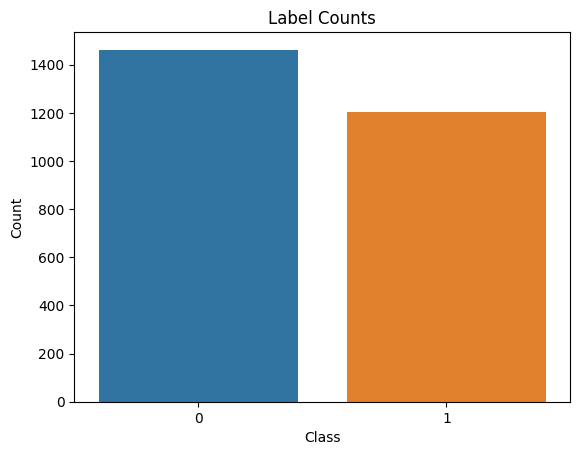

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the count of 0 and 1 labels
print("Label Counts:\n", data["Class"].value_counts())

# Plot a bar graph of the label counts
sns.countplot(data=data, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label Counts")
plt.show()

# ****Balancing the dataset

In [72]:
from imblearn.over_sampling import SMOTE
# Separate the features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

In [73]:
X.dropna(inplace=True)
y = y[X.index]

In [74]:
# Apply SMOTE
sm = SMOTE(sampling_strategy=1.0, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Create a new balanced dataset
balanced_setf2 = pd.concat([X_res, y_res], axis=1)

In [78]:
output_path = '/kaggle/working/'
balanced_setf2.to_csv(output_path + 'balanced_datasetf4.csv', index=False)

In [79]:


df = pd.read_csv("/kaggle/working/balanced_datasetf4.csv")
df.head()

,Total Combinations,Total Sections per Citing ID,Citation in discussion,Citation in introduction,Citation in method,Citation in result,SimilarityTt,SimilarityT,Class
0,1,1,0,1,0,0,0.51,0.94,0
1,1,1,0,1,0,0,0.44,0.89,0
2,9,3,5,2,2,0,0.63,0.90,0
3,1,1,1,0,0,0,0.51,0.89,0
4,1,1,1,0,0,0,0.64,0.93,0


Label Counts:
 0    1462
1    1462
Name: Class, dtype: int64


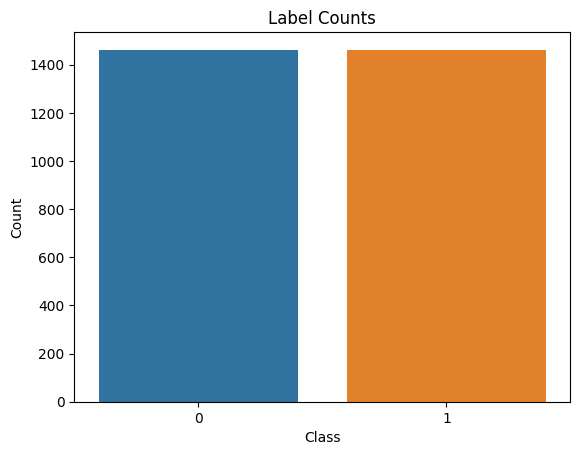

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the count of 0 and 1 labels
print("Label Counts:\n", df["Class"].value_counts())

# Plot a bar graph of the label counts
sns.countplot(data=df, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label Counts")
plt.show()

# ******Applying machin learning model**

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import GRU, Dense, Conv1D, MaxPooling1D, LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten

In [81]:
# Split the dataset into training and testing sets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
# Preprocess the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [83]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# ****Defining the models

In [84]:
# define models
gru_model = Sequential()
gru_model.add(GRU(units=16, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dense(units=1, activation='sigmoid'))
gru_model.compile(optimizer='adam', loss='binary_crossentropy')

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy')

lstm_model = Sequential()
lstm_model.add(LSTM(units=16, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(units=1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy')

ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(units=1, activation='sigmoid'))
ann_model.compile(optimizer='adam', loss='binary_crossentropy')

# ****Fitting the models

In [91]:
from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(patience=10, verbose=10)  # Define the EarlyStopping callback

try:
    gru_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2 )
    cnn_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)
    lstm_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)
    ann_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)
except Exception as e:
    # Rollback or error handling code
    print("An error occurred during training:", e)
    rollback() 

Epoch 1/25
59/59 [==============================] - 1s 9ms/step - loss: 0.4979 - val_loss: 0.5577
Epoch 2/25
59/59 [==============================] - 0s 8ms/step - loss: 0.4901 - val_loss: 0.5576
Epoch 3/25
59/59 [==============================] - 0s 8ms/step - loss: 0.4877 - val_loss: 0.5511
Epoch 4/25
59/59 [==============================] - 0s 8ms/step - loss: 0.4880 - val_loss: 0.5537
Epoch 5/25
59/59 [==============================] - 1s 9ms/step - loss: 0.4815 - val_loss: 0.5511
Epoch 6/25
59/59 [==============================] - 1s 9ms/step - loss: 0.4838 - val_loss: 0.5475
Epoch 7/25
59/59 [==============================] - 1s 9ms/step - loss: 0.4763 - val_loss: 0.5433
Epoch 8/25
59/59 [==============================] - 0s 8ms/step - loss: 0.4752 - val_loss: 0.5485
Epoch 9/25
59/59 [==============================] - 0s 8ms/step - loss: 0.4766 - val_loss: 0.5434
Epoch 10/25
59/59 [==============================] - 0s 7ms/step - loss: 0.4754 - val_loss: 0.5404
Epoch 11/25
59/59 [

# **GRU Predication**

In [86]:
gru_y_pred = gru_model.predict(X_test)
gru_y_pred = np.round(gru_y_pred).astype(int)
gru_accuracy = accuracy_score(y_test, gru_y_pred)
gru_precision = precision_score(y_test, gru_y_pred)
gru_recall = recall_score(y_test, gru_y_pred)
gru_f_measure = 2 * (gru_precision * gru_recall) / (gru_precision + gru_recall)
print("Accuracy:", gru_accuracy)
print("Precision:",gru_precision)
print("Recall:", gru_recall)
print("F-measure:", gru_f_measure)

19/19 [==============================] - 0s 2ms/step
Accuracy: 0.7418803418803419
Precision: 0.8305084745762712
Recall: 0.6384364820846905
F-measure: 0.7219152854511971


# **CNN Prediction**

In [87]:
cnn_y_pred = cnn_model.predict(X_test)
cnn_y_pred = np.round(cnn_y_pred).astype(int)
cnn_accuracy = accuracy_score(y_test, cnn_y_pred)
cnn_precision = precision_score(y_test, cnn_y_pred)
cnn_recall = recall_score(y_test, cnn_y_pred)
cnn_f_measure = 2 * (cnn_precision * cnn_recall) / (cnn_precision + cnn_recall)

print("Accuracy:", cnn_accuracy)
print("Precision:",cnn_precision)
print("Recall:", cnn_recall)
print("F-measure:", cnn_f_measure)

19/19 [==============================] - 0s 2ms/step
Accuracy: 0.7931623931623931
Precision: 0.8345323741007195
Recall: 0.755700325732899
F-measure: 0.7931623931623931


# **LSTM Prediction**

In [89]:
lstm_y_pred = lstm_model.predict(X_test)
lstm_y_pred = np.round(lstm_y_pred).astype(int)
lstm_accuracy = accuracy_score(y_test, lstm_y_pred)
lstm_precision = precision_score(y_test, lstm_y_pred)
lstm_recall = recall_score(y_test, lstm_y_pred)
lstm_f_measure = 2 * (lstm_precision * lstm_recall) / (lstm_precision + lstm_recall)
print("Accuracy:", lstm_accuracy)
print("Precision:",lstm_precision)
print("Recall:", lstm_recall)
print("F-measure:", lstm_f_measure)

19/19 [==============================] - 1s 3ms/step
Accuracy: 0.7128205128205128
Precision: 0.7527272727272727
Recall: 0.6742671009771987
F-measure: 0.7113402061855669


# **ANN Preddiction**

In [90]:
ann_y_pred = ann_model.predict(X_test)
ann_y_pred= np.round(ann_y_pred).astype(int)
ann_accuracy = accuracy_score(y_test, ann_y_pred)
ann_precision = precision_score(y_test, ann_y_pred)
ann_recall = recall_score(y_test, ann_y_pred)
ann_f_measure = 2 * (ann_precision * ann_recall) / (ann_precision + ann_recall)
print("Accuracy:", ann_accuracy)
print("Precision:",ann_precision)
print("Recall:", ann_recall)
print("F-measure:", ann_f_measure)


19/19 [==============================] - 0s 1ms/step
Accuracy: 0.7897435897435897
Precision: 0.8622047244094488
Recall: 0.7133550488599348
F-measure: 0.7807486631016042


# **Comparision**

In [62]:
results = pd.DataFrame({
    'Model': ['GRU','CNN', 'LSTM','ANN'],
    'Precision': [gru_precision,cnn_precision, lstm_precision,ann_precision],
    'Recall': [gru_recall,cnn_recall, lstm_recall,ann_recall],
    'Accuracy': [gru_accuracy,cnn_accuracy, lstm_accuracy,ann_accuracy],
    'F Measure':[gru_f_measure,cnn_f_measure,lstm_f_measure,ann_f_measure]
    
})
print(results)

  Model  Precision    Recall  Accuracy  F Measure
0   GRU   0.828996  0.726384  0.777778   0.774306
1   CNN   0.856604  0.739414  0.798291   0.793706
2  LSTM   0.859375  0.716612  0.789744   0.781528
3   ANN   0.846442  0.736156  0.791453   0.787456


In [ ]:
df_results = pd.DataFrame.from_dict(results)

# Display the table
print(df_results)
colors = ['#F8766D', '#00BA38', '#619CFF', '#F564E3']
# Plot the results
df_results.plot(x='Model', y=['Precision', 'Recall', 'Accuracy'], kind='bar',color=colors)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()